# Linear optimization in Python

## What is linear programming?

Linear programming is a set of techniques used in mathematical programming, sometimes called mathematical optimization, to solve systems of linear equations and inequalities while maximizing or minimizing some linear function. It’s important in fields like scientific computing, economics, technical sciences, manufacturing, transportation, military, management, energy, and so on.

For example, imagine that you have a system of linear equations and inequalities. Such systems often have many possible solutions. Linear programming is a set of mathematical and computational tools that allows you to find a particular solution to this system that corresponds to the maximum or minimum of some other linear function.

## A simple linear problem

Let’s first solve the linear programming problem 

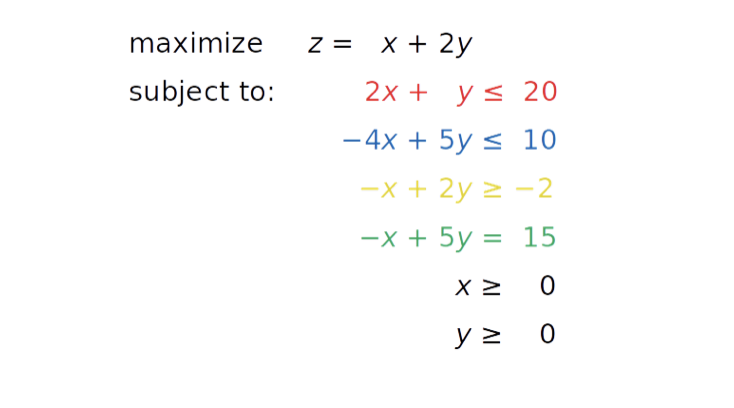




In this section, you’ll learn how to use the SciPy optimization and root-finding library for linear programming.

To define and solve optimization problems with SciPy, you need to install and import `scipy.optimize.linprog():`

In [9]:
!pip install scipy pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from scipy.optimize import linprog

The next step is to define the input values:

You put the values from the system above into the appropriate lists, tuples, or NumPy arrays:

- `obj` holds the coefficients from the objective function.
- `lhs_ineq` holds the left-side coefficients from the inequality (red, blue, and yellow) constraints.
- `rhs_ineq` holds the right-side coefficients from the inequality (red, blue, and yellow) constraints.
- `lhs_eq` holds the left-side coefficients from the equality (green) constraint.
- `rhs_eq` holds the right-side coefficients from the equality (green) constraint.

In [3]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  # Red constraint left side
            [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
             2]  # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [4]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

Finally, it’s time to optimize and solve your problem of interest. You can do that with `linprog()`. 

In the code below, the parameter `c` refers to the coefficients from the objective function. `A_ub` and `b_ub` are related to the coefficients from the left and right sides of the inequality constraints, respectively. Similarly, `A_eq` and `b_eq` refer to equality constraints. You can use bounds to provide the lower and upper bounds on the decision variables.

In [5]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
              method="revised simplex")
opt


<ipython-input-5-09b67cb628ac>:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.818181818181817
       x: [ 7.727e+00  4.545e+00]
     nit: 3

Thw `.fun` method returns the objective function value at the optimum (if found).

In [10]:
opt.fun



-16.818181818181817

The `.success` method is a Boolean that shows whether the optimal solution has been found.

In [7]:
opt.success


True

## The Resource Allocation Problem

Say that a factory produces four different products, and that the daily produced amount of the first product is x₁, the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:

1. The profit per unit of product is `$20`, `$12`, `$40`, and `$25` for the first, second, third, and fourth product, respectively.
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.
3. For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. Finally, each unit of the fourth product requires three units of B.
4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and ninety units of B per day.

The mathematical model can be defined like this:

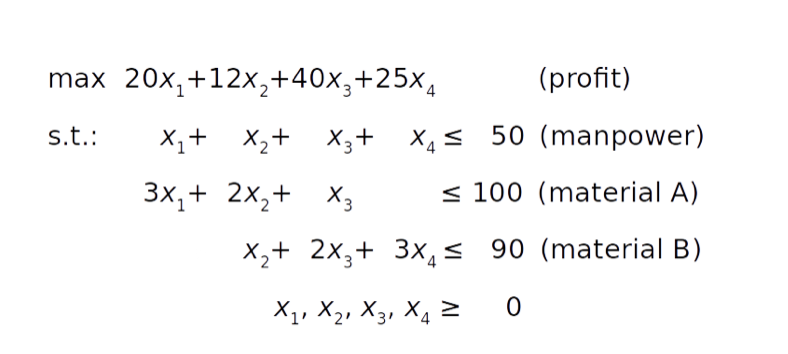
The objective function (profit) is defined in condition 1. The manpower constraint follows from condition 2. The constraints on the raw materials A and B can be derived from conditions 3 and 4 by summing the raw material requirements for each product.

Finally, the product amounts can’t be negative, so all decision variables must be greater than or equal to zero.

As in the previous example, you need to extract the necessary vectors and matrix from the problem above, pass them as the arguments to `.linprog()`, and get the results:

In [11]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Manpower
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              method="revised simplex")
opt


<ipython-input-11-3de79e7824ba>:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1900.0
       x: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
     nit: 2

This result tells you that the maximal profit is 1900 and corresponds to x₁ = 5 and x₃ = 45. It’s not profitable to produce the second and fourth products under the given conditions. 

Finally, `opt.status` is `0` and `opt.success` is `True`, indicating that the optimization problem was successfully solved with the optimal feasible solution.